In [39]:
# Prepare environment and load data
import pandas as pd
import numpy as np
import nltk
import feather

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

cosim_df = feather.read_dataframe('../parsed_data/event_cosine_sim.feather')
# Remove Hillary dictionary
cosim_df.drop(cosim_df.columns[[5, 9]], axis=1, inplace=True)
cosim_df.head(2)

,DocNumber,date,edited_x,benghazi,wiki_leak,doctrine,arab_spring,russian_reset
0,C05739545,09/12/2012,0.0,0.011,0.014,0.009,0.005,0.018
1,C05739546,03/03/2011,1.0,0.098,0.091,0.081,0.095,0.078


In [40]:
# Rate of redacted emails
np.sum(cosim_df.edited_x) / len(cosim_df)

0.54921285037757583

In [43]:
cosim_df.describe().T

,count,mean,std,min,25%,50%,75%,max
edited_x,7813.0,0.549213,0.497604,0.0,0.000,1.000,1.000,1.000
benghazi,7813.0,0.023700,0.025388,0.0,0.009,0.014,0.027,0.240
wiki_leak,7813.0,0.027443,0.025480,0.0,0.012,0.017,0.032,0.186
doctrine,7813.0,0.028286,0.024905,0.0,0.012,0.018,0.034,0.157
arab_spring,7813.0,0.019886,0.023892,0.0,0.006,0.010,0.022,0.190
russian_reset,7813.0,0.022513,0.016693,0.0,0.010,0.017,0.030,0.099


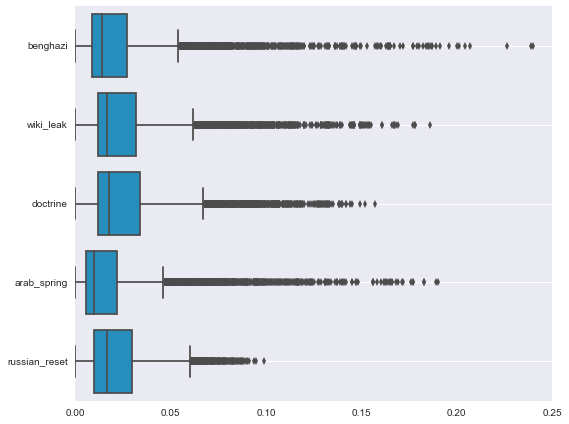

In [42]:
# Visualise distribution of emails by topic cosim
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.boxplot(data=cosim_df.ix[:,3:], orient='h')
boxes = ax.artists

for i,box in enumerate(boxes):
        box.set_facecolor('#278DBC')

ax.yaxis.grid() # horizontal lines
ax.xaxis.grid() # vertical lines
plt.tight_layout()
plt.show()

In [44]:
# Set cos_sim below certain threshold equal to zero
cosim_df2 = cosim_df.copy()
# cosim_df2.ix[:,3:] = cosim_df2.ix[:,3:].applymap(lambda x: round(x, 2) if x > 0.01 else 0)
cosim_df2.benghazi = cosim_df2.benghazi.apply(lambda x: round(x, 3) if x > np.percentile(cosim_df2.benghazi, 75) else 0)
cosim_df2.wiki_leak = cosim_df2.wiki_leak.apply(lambda x: round(x, 3) if x > np.percentile(cosim_df2.wiki_leak, 75) else 0)
cosim_df2.doctrine = cosim_df2.doctrine.apply(lambda x: round(x, 3) if x > np.percentile(cosim_df2.doctrine, 75) else 0)
cosim_df2.arab_spring = cosim_df2.arab_spring.apply(lambda x: round(x, 3) if x > np.percentile(cosim_df2.arab_spring, 75) else 0)
cosim_df2.russian_reset = cosim_df2.russian_reset.apply(lambda x: round(x, 3) if x > np.percentile(cosim_df2.russian_reset, 75) else 0)

In [49]:
# Set emails topic to be that which the email has the highest cosine similarity to
topic_df = cosim_df2.copy()
topic_df.insert(3, 'NA', 0)
topic_df['email_topic'] = topic_df.ix[:,3:].idxmax(axis=1)

# Make dummies for email topics
topic_df = pd.concat([topic_df[['DocNumber', 'date', 'edited_x']],
                      pd.get_dummies(topic_df.email_topic, prefix='')], 
                      axis=1)

In [56]:
total_topics = np.sum(topic_df['_benghazi']) + np.sum(topic_df['_arab_spring']) + np.sum(topic_df['_wiki_leak']) + np.sum(topic_df['_doctrine']) + np.sum(topic_df['_russian_reset'])
total_topics / len(cosim_df)
# total_topics
# np.sum(topic_df['_benghazi'])
# np.sum(topic_df['_arab_spring'])
# np.sum(topic_df['_wiki_leak'])
# np.sum(topic_df['_doctrine'])
# np.sum(topic_df['_russian_reset'])

0.3140918981185204

In [ ]:
# Group by same month in year to count number of emails per topic
# i.e. -> emails sent per topic monthly
# topic_df.date = pd.to_datetime(topic_df.date, format='%m/%d/%Y')
# topic_df.date = pd.to_datetime(topic_df.date, format='%m/%d/%Y')
# monthly = pd.DataFrame.groupby(topic_df, by=[topic_df.index.year, topic_df.index.month]).aggregate(np.sum)

# monthly
# [x.strip() for x in my_string.split(',')]
m_y = [(x.split('/')[0], x.split('/')[2]) for x in topic_df.date.tolist()]

In [ ]:
# Dataframe for visualisations
# topic_df.index.year

vis_df = topic_df.copy()
# vis_df['year'] = [y for y, m in vis_df.date.tolist()]
# vis_df['month'] = [m for y, m in vis_df.date.tolist()]
# vis_df['year_month'] = [ for y, m in vis_df.date.tolist()]

In [ ]:
# total_topics
np.sum(vis_df._benghazi)

In [ ]:
sns.set_style("white")
sns.set_context({"figure.figsize": (17, 6)}) #Passing in matplotlib commands directly

#Plot data
#Use dataset.index as my x_order, to ensure proper ordering by using numeric series
plot_emails = sns.barplot(vis_df.month, 
                          "_doctrine", 
                          data = vis_df, 
                          color = "#278DBC", dropna = False, ci = None,
                          x_order = vis_df.month)


#Hack to use matplotlib directly to set bar width, since Seaborn doesn't currently allow for setting bar width
plot_emails = vis_df.month.plot(kind='bar', 
                                width = .5,
                                color =  '#000099', clip_on=False, grid=False)
plot_emails.yaxis.grid(color='gray', linestyle='solid')
plot_emails.set_axisbelow(True)


#Remove borders around graph, remove axis labels
#Needs to be called after plot generated or it doesn't work
# sns.despine(left=True) 
# sns.axlabel("", "") 

#Set custom labels for chart
sns_views.set_xticklabels(vis_df.month, rotation=0)

#Create legend using same matplotlib code from above
# sns_views.legend([emails, edited], ['emails', 'edited'], loc=1, ncol = 2)

In [ ]:
planets.head(3)

In [ ]:
# Barplot of emails by topic over time
sns.set(style="white")
sns.set_context({"figure.figsize": (17, 6)}) #Passing in matplotlib commands directly

# Make a range of years to show categories with no observations
years = np.arange(2007, 2015)


#Plot data
#Use dataset.index as my x_order, to ensure proper ordering by using numeric series
sns_views = sns.barplot(dataset.Month, "Views", data = dataset, color = "#278DBC", dropna = False, ci=None, x_order=dataset.Month)




# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x = vis_df.year,
                   data = vis_df,
                   kind = "count",
                   palette = "BuPu",
                   size = 6, aspect = 1.5, order = years)

g.set_xticklabels(step=2)

In [ ]:
sns.set(style="white")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Make a range of years to show categories with no observations
years = np.arange(2000, 2015)

# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x="year", data=planets, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=2)

planets.head()

In [ ]:
sns.set(style="white")

# Make a range of years to show categories with no observations
years = np.arange(2000, 2015)

# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x="year", data=cosim_df, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)

g.set_xticklabels(step=2)

In [ ]:
# Split up the inv_num in lists into seperate columns
# arg: id_vars -cols not to 'un-pivot'
# arg: value_vars -names of the new cols created in the stretched df
#       = length of list in original in_num list


# data = []
# for i in range(5):
#     data.append(dict(zip(np.random.choice(10, replace=False, size=5),
#                          np.random.randint(10, size=5))))
# df = pd.DataFrame(data)
# print(df)
# In other words, do not form a new DataFrame for each row. 
# Instead, collect all the data in a list of dicts, 
# and then call df = pd.DataFrame(data) once at the end, outside the loop.